Helps me select candidates for qualitative analysis: i.e. saliency maps

In [1]:
import pandas as pd

In [2]:
path = "/home/vincent/Documenten/BachelorsProject/Rijksdata/type/"

In [3]:
def setFromCsv(csv_file):
    df = pd.read_csv(csv_file)
    return {tuple(sample) for sample in df.values.tolist()}

In [4]:
train = []
val_test = []

for ds in range(5):
    train += [setFromCsv(path + str(ds) + "/fullsize-train.csv")]
    val_test += [setFromCsv(path + str(ds) + "/fullsize-val.csv")]
    val_test += [setFromCsv(path + str(ds) + "/fullsize-test.csv")]

In [5]:
# Finding datapoints that occur in all 5 datasets, but in none as a training instance
# In other words: all the datapoints none of the models have seen while learning
candidates = set()

for s in val_test:
    candidates = candidates | s
    print(len(candidates))

print("-" * 20)

for s in train:
    candidates = candidates - s
    print(len(candidates))

print("-" * 20)

print(len(candidates))

960
1933
2764
3595
4291
5010
5630
6291
6863
7404
--------------------
4225
2928
2463
2204
2011
--------------------
2011


In [6]:
matsDf = pd.DataFrame([x[1] for x in candidates], columns=["material"])
matsDf.value_counts()

material         
prent                938
tekening             712
schilderij           289
foto                  65
beeldhouwwerk          1
bord (vaatwerk)        1
demonstratiemodel      1
fles                   1
pot                    1
schotel                1
tekstblad              1
dtype: int64

In [7]:
materials = set()
for instance in candidates:
    materials = materials | {instance[1]}

In [8]:
# I don't know why I put this much effort into a prompt I only use myself... XD
def yesno(prompt):
    answer = input(prompt).lower()
    if "y" in answer:
        return True
    if "n" in answer:
        return False
    return yesno("Invalid input. Please eiher type 'y' or 'n' ")

The length is now 5. Please remove 2 images


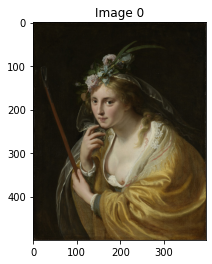

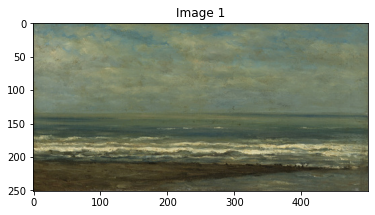

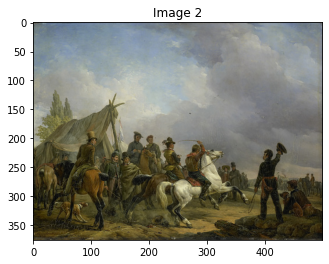

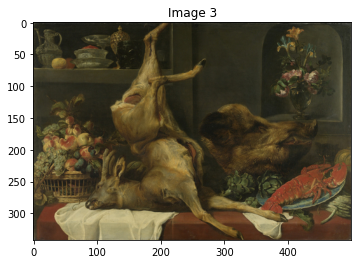

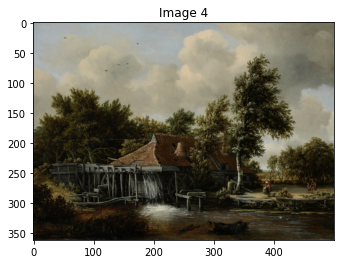

Now doing material 'demonstratiemodel'


In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as implot
from random import shuffle
from IPython.display import clear_output

impath = "/home/vincent/Documenten/BachelorsProject/Rijksdata/jpg/"

def user_select(subset, max_init, target_len):
    # Random subset of max 30
    subset = list(subset)
    
    if len(subset) > max_init:
        shuffle(subset)
        subset = subset[:max_init]
    
    while(len(subset) > target_len):
        clear_output()
        print(f"The length is now {len(subset)}. Please remove {len(subset) - target_len} images")
        for idx, img in enumerate(subset):
            plt.imshow(implot.imread(impath + img[0]))
            plt.title("Image " + str(idx))
            plt.show()
        
        newset = []
        for idx, img in enumerate(subset):
            if yesno(f"Keep image {idx}? "):
                newset += [img]
        subset = newset
    
    return subset

final_list = []
for mat in materials:
    subset = [x for x in candidates if x[1] == mat]
    print(f"Now doing material '{mat}'", flush=True)
    input("Press any key to continue...")
    final_list += user_select(subset, 20, 3)

In [18]:
final_df = pd.DataFrame(final_list, columns=["jpg", "material"])
final_df

,jpg,material
0,0027383_RP-P-BI-450.jpg,prent
1,0046426_RP-P-1949-171.jpg,prent
2,0097362_RP-P-OB-10.207.jpg,prent
3,0111137_RP-P-OB-77.579A.jpg,tekstblad
4,0006891_BK-NM-3964.jpg,pot
5,0006156_BK-NM-2681-A.jpg,schotel
6,0063613_RP-T-1888-A-1828.jpg,tekening
7,0066564_RP-T-1959-456.jpg,tekening
8,0067055_RP-T-1899-A-4123.jpg,tekening
9,0006660_BK-NM-4176.jpg,bord (vaatwerk)


In [19]:
target_path = "/home/vincent/Documenten/BachelorsProject/GitHub_Repo/data_annotations/qualitative.csv"
final_df.to_csv(target_path, index=False)

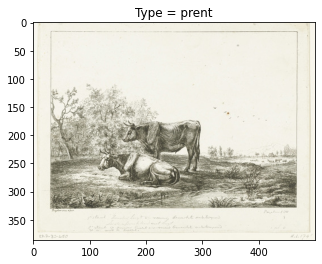

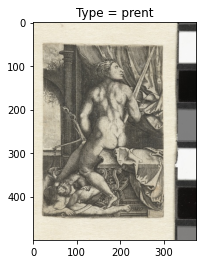

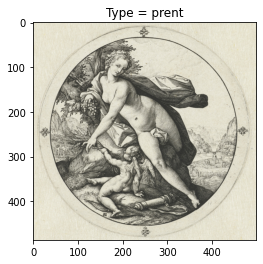

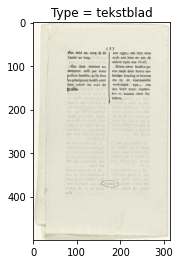

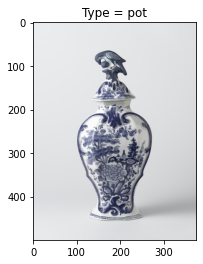

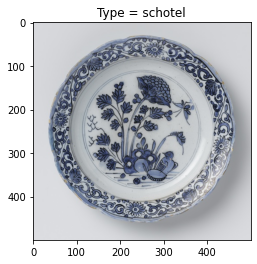

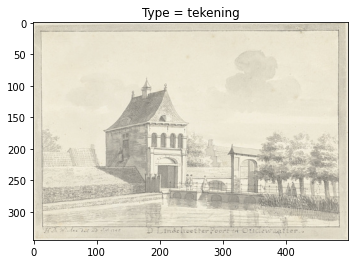

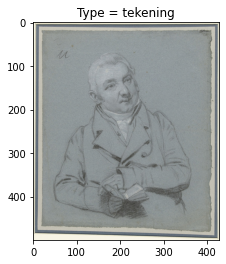

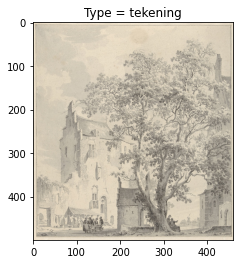

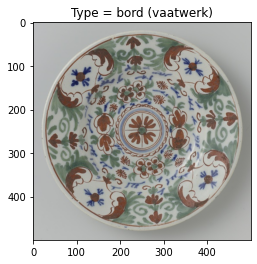

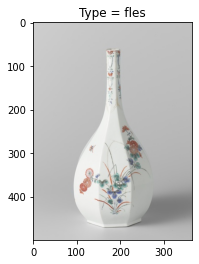

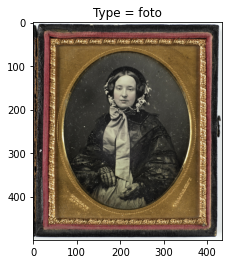

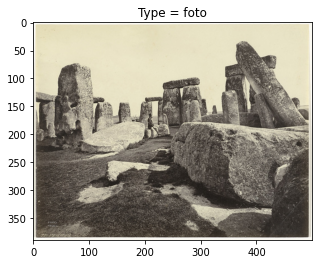

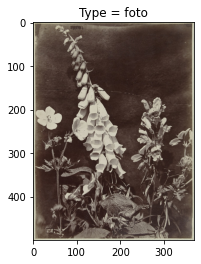

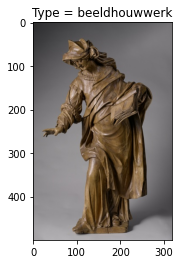

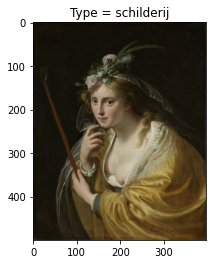

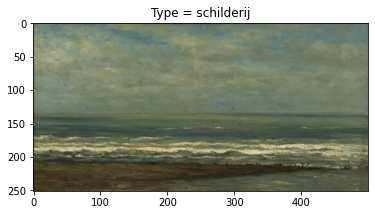

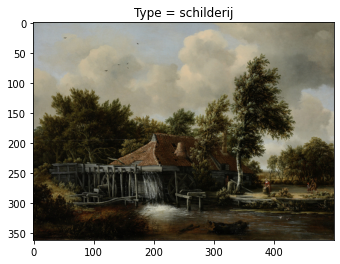

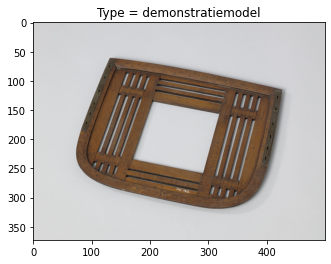

In [20]:
"The final list"
for elem in final_list:
    plt.imshow(implot.imread(impath + elem[0]))
    plt.title(f"Type = {elem[1]}")
    plt.show()